In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('UNSW_NB15_training-set.csv')

In [3]:
df.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [4]:
#df_1 = pd.get_dummies(df, columns = ['proto','service','state'])
label_encoder = LabelEncoder()
for col in ['proto', 'service', 'state', 'attack_cat']:
    df[col] = label_encoder.fit_transform(df[col])
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,119,2,3,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,5,1
175337,175338,0.505762,113,0,2,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,8,1
175338,175339,0.000009,119,2,3,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,5,1
175339,175340,0.000009,119,2,3,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,5,1


In [5]:
#data = df_1.drop(columns = ['proto_3pc','proto_icmp','proto_a/n','proto_aes-sp3-d','proto_any','proto_argus','proto_aris','proto_ax.25','proto_bbn-rcc','proto_bna','proto_br-sat-mon','proto_cbt','proto_cftp','proto_chaos','proto_compaq-peer','proto_cphb','proto_cpnx','proto_crtp','proto_crudp','proto_dcn','proto_ddp','proto_ddx','proto_dgp','proto_egp','proto_eigrp','proto_emcon','proto_encap','proto_etherip','proto_fc','proto_fire','proto_ggp','proto_gmtp','proto_gre','proto_hmp','proto_i-nlsp','proto_iatp','proto_ib','proto_idpr','proto_idpr-cmtp','proto_idrp','proto_ifmp','proto_igmp','proto_igp','proto_il','proto_ip','proto_ipcomp','proto_ipcv','proto_ipip','proto_iplt','proto_ipnip','proto_ippc','proto_ipv6','proto_ipv6-frag','proto_ipv6-no','proto_ipv6-opts','proto_ipv6-route','proto_ipx-n-ip','proto_irtp','proto_isis','proto_iso-ip','proto_iso-tp4','proto_kryptolan','proto_l2tp','proto_larp','proto_leaf-1','proto_leaf-2','proto_merit-inp','proto_mfe-nsp','proto_mhrp','proto_micp','proto_mobile','proto_mtp','proto_mux','proto_narp','proto_netblt','proto_nsfnet-igp','proto_nvp','proto_pgm','proto_pim','proto_pipe','proto_pnni','proto_pri-enc','proto_prm','proto_ptp','proto_pup','proto_pvp','proto_qnx','proto_rdp','proto_rsvp','proto_rtp','proto_rvd','proto_sat-expak','proto_sat-mon','proto_sccopmce','proto_scps','proto_sctp','proto_sdrp','proto_secure-vmtp','proto_sep','proto_skip','proto_sm','proto_smp','proto_snp','proto_sprite-rpc','proto_sps','proto_srp','proto_st2','proto_stp','proto_sun-nd','proto_swipe','proto_tcf','proto_tlsp','proto_tp++','proto_trunk-1','proto_trunk-2','proto_ttp','proto_uti','proto_vines','proto_visa','proto_vmtp','proto_vrrp','proto_wb-expak','proto_wb-mon','proto_wsn','proto_xnet','proto_xns-idp','proto_xtp','proto_zero','service_dhcp','service_ftp','service_ftp-data','service_irc','service_pop3','service_radius','service_snmp','service_ssh','service_ssl','state_CON','state_ECO','state_PAR','state_RST','state_URN','state_no'])
#data_1 = df.drop(columns = ['attack_cat'])
corr = df.corr()
corr.style.background_gradient(cmap = "coolwarm")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,1.000000,0.006587,0.013943,0.038238,0.518446,-0.068827,-0.126316,0.001104,-0.080283,0.364575,0.615508,-0.049604,0.143649,-0.356902,-0.018451,-0.099755,0.027197,-0.027327,-0.019626,-0.081799,-0.416529,-0.326110,-0.326044,-0.412318,0.001216,-0.004703,0.007422,-0.083356,-0.361818,-0.019404,-0.020558,0.478979,0.617467,0.467591,0.536544,0.601158,0.539093,-0.037636,-0.037636,-0.028287,0.425396,0.480899,0.033142,-0.271955,0.727173
dur,0.006587,1.000000,-0.124502,-0.008234,0.103443,0.254559,0.181182,0.199731,0.144134,-0.120966,0.012196,0.044159,-0.081749,-0.050603,0.198597,0.142963,0.080055,0.152142,0.144413,0.157443,0.022047,0.013183,0.014724,0.017527,0.053125,0.051093,0.049332,0.090028,0.025336,0.002071,0.078915,-0.113709,0.186293,-0.086300,-0.094091,-0.093923,-0.101760,0.020641,0.020641,0.024743,-0.080871,-0.115336,0.035370,-0.097825,0.036175
proto,0.013943,-0.124502,1.000000,0.170032,-0.172441,0.013469,0.026439,0.005920,0.015812,0.013924,0.049944,0.113184,0.004759,0.046375,0.011392,0.020002,-0.562789,-0.052417,0.016011,0.019388,0.138967,0.108571,0.108630,0.137605,0.079193,0.073528,0.076362,0.042157,0.077296,0.020709,0.006005,0.203057,-0.162433,0.191101,0.174965,0.165796,0.175708,0.018003,0.018003,0.028809,0.168121,0.198594,-0.585941,0.174490,0.020267
service,0.038238,-0.008234,0.170032,1.000000,-0.144978,0.114403,0.077338,0.105188,0.035492,-0.141709,-0.295302,0.262970,-0.166339,-0.099581,0.114522,0.051495,-0.089971,-0.020190,-0.011469,0.090262,0.292887,0.237103,0.237723,0.300035,0.140239,0.110995,0.155811,0.224861,0.145641,0.191839,0.056951,-0.058269,-0.205943,0.047685,0.038347,0.051106,-0.006774,0.071051,0.071051,0.266206,0.028599,-0.048011,-0.088847,-0.056009,0.035052
state,0.518446,0.103443,-0.172441,-0.144978,1.000000,-0.078701,-0.098268,-0.049300,-0.059759,0.432307,0.584697,-0.375533,0.292570,-0.150501,-0.060125,-0.071056,0.095492,-0.076235,-0.045441,-0.064747,-0.367493,-0.314361,-0.313922,-0.397710,-0.278469,-0.261882,-0.264946,-0.070796,-0.256392,-0.056128,-0.025541,0.385515,0.759825,0.328748,0.372309,0.408662,0.429906,-0.051970,-0.051970,-0.078856,0.323019,0.387446,0.094198,-0.237008,0.497685
spkts,-0.068827,0.254559,0.013469,0.114403,-0.078701,1.000000,0.390067,0.963791,0.206609,-0.076358,-0.102723,0.068246,-0.051646,0.075897,0.971069,0.207798,-0.017587,-0.001678,-0.000384,0.017096,0.131813,0.107410,0.102161,0.133102,0.039187,0.035507,0.038725,0.216592,0.150237,0.008834,0.087217,-0.069127,-0.086170,-0.060194,-0.068373,-0.072484,-0.077553,0.009951,0.009951,0.006084,-0.061584,-0.069598,-0.017770,-0.008428,-0.052178
dpkts,-0.126316,0.181182,0.026439,0.077338,-0.098268,0.390067,1.000000,0.188476,0.971907,-0.098202,-0.192580,0.053861,-0.066710,0.139145,0.204883,0.978636,-0.022160,-0.006514,0.000229,0.054371,0.183703,0.144119,0.142667,0.185555,0.020915,0.015936,0.023899,0.014697,0.441445,0.029042,0.442194,-0.079095,-0.150023,-0.071909,-0.086695,-0.094267,-0.094085,0.013491,0.013491,0.047974,-0.075190,-0.078342,-0.021765,0.035163,-0.118591
sbytes,0.001104,0.199731,0.005920,0.105188,-0.049300,0.963791,0.188476,1.000000,0.009926,-0.028468,-0.020860,0.063009,-0.018322,-0.007829,0.996109,0.006804,-0.006565,0.000024,-0.002054,-0.003516,0.050450,0.043164,0.037988,0.050981,0.043624,0.039739,0.042883,0.232348,-0.004973,0.003428,0.001620,-0.034395,-0.012053,-0.026661,-0.026490,-0.027281,-0.032061,-0.004515,-0.004515,-0.002185,-0.027479,-0.034553,-0.006367,-0.040022,0.018576
dbytes,-0.080283,0.144134,0.015812,0.035492,-0.059759,0.206609,0.971907,0.009926,1.000000,-0.059475,-0.135515,0.023559,-0.040430,0.104757,0.017366,0.996504,-0.013618,-0.007701,-0.002422,0.0

In [6]:
from collections import Counter

xs = df.drop(columns = ['id','label', 'attack_cat'])
ys = df[['label']]

X_train = xs
y_train = ys


smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#counter = Counter(y_train)

#for k,v in counter.items():
#    per = v / len(y_train) * 100
#    print('Class = %d, n = %d (%.3f%%)'% (k, v, per))

 
#X_train, X_val, y_train, y_val = train_test_split(xs,ys,train_size = 0.7, stratify = ys, random_state = 42)

In [7]:
xs.shape, X_train.shape

((175341, 42), (238682, 42))

In [8]:
df_2 = pd.read_csv('UNSW_NB15_testing-set.csv')

for col in ['proto', 'service', 'state', 'attack_cat']:
    df_2[col] = label_encoder.fit_transform(df_2[col])
df_2
test_x = df_2.drop(columns = ['id','label', 'attack_cat'])
test_y = df_2[['label']]

X_test = test_x
y_test = test_y

In [9]:
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()

# Fit on training data and transform all datasets
X_train_scaled = scaler_1.fit_transform(X_train)
X_test_scaled = scaler_1.transform(X_test)

#y_train_scaled = scaler_2.fit_transform(y_train)
#y_val_scaled = scaler_2.transform(y_val)
#y_test_scaled = scaler_2.transform(y_test)


In [10]:
import torch 

# Convert numpy arrays to PyTorch tensors

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)



X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [11]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim


# Creating Tensor datasets

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
'''
class Attention(nn.Module):
    def __init__(self, input_dim):
        super(Attention, self).__init__()
        self.query = nn.Linear(input_dim, input_dim)
        self.key = nn.Linear(input_dim, input_dim)
        self.value = nn.Linear(input_dim, input_dim)

    def forward(self, x):
        # Compute the queries, keys, and values
        Q = self.query(x)  # (batch_size, seq_len, input_dim)
        K = self.key(x)    # (batch_size, seq_len, input_dim)
        V = self.value(x)  # (batch_size, seq_len, input_dim)

        # Scaled dot-product attention
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(Q.size(-1), dtype=torch.float32))
        attention_weights = F.softmax(attention_scores, dim=-1)

        # Apply the attention weights to the values
        attended_values = torch.matmul(attention_weights, V)
        
        return attended_values
'''
class MultiHeadAttention(nn.Module):
    def __init__(self, input_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.head_dim = input_dim // num_heads
        self.scale = torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32))
        
        self.query = nn.Linear(input_dim, input_dim)
        self.key = nn.Linear(input_dim, input_dim)
        self.value = nn.Linear(input_dim, input_dim)
        self.fc_out = nn.Linear(input_dim, input_dim)
    
    def forward(self, x):
        batch_size = x.size(0)
        
        Q = self.query(x)  # (batch_size, seq_len, input_dim)
        K = self.key(x)
        V = self.value(x)
        
        # Reshape for multi-head attention
        Q = Q.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        
        # Scaled dot-product attention
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / self.scale
        attention_weights = F.softmax(attention_scores, dim=-1)
        attended_values = torch.matmul(attention_weights, V)
        
        # Concatenate heads and pass through final linear layer
        attended_values = attended_values.permute(0, 2, 1, 3).reshape(batch_size, -1, self.num_heads * self.head_dim)
        return self.fc_out(attended_values)

class MultiLabelCNNWithAttention(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MultiLabelCNNWithAttention, self).__init__()

        # Define layers
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(2, stride=2),
            nn.BatchNorm1d(32)
        )
        self.layer2 = nn.Sequential(
            nn.Conv1d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(2, stride=2),
            nn.BatchNorm1d(64)
        )
        self.layer3 = nn.Sequential(
            nn.Conv1d(64, 128, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(2, stride=2),
            nn.BatchNorm1d(128)
        )
        self.layer4 = nn.Sequential(
            nn.Conv1d(128, 256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.BatchNorm1d(256)
        )

        self.attention = MultiHeadAttention(256)  # Attention layer to apply after conv layers
        
        self.dropout = nn.Dropout(p=0.6)

        # Calculate output size for the fully connected layer after conv layers
        fc_input_dim = 256 * (input_dim//8)  # Hardcode the correct dimension based on the output shape

        self.fc1 = nn.Linear(fc_input_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension for Conv1d input (batch, channels, length)
        
        # Apply conv layers with batch normalization and pooling
        x = self.layer1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        x = self.dropout(x)
        x = self.layer3(x)
        x = self.dropout(x)
        x = self.layer4(x)

        # Apply attention after the last convolution layer
        x = x.transpose(1, 2)  # (batch_size, seq_len, feature_dim)
        x = self.attention(x)
        x = x.transpose(1, 2)  # Transpose back to (batch_size, feature_dim, seq_len)

        # Flatten the tensor using reshape instead of view
        x = x.reshape(x.size(0), -1)

        # Dropout and fully connected layers
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return self.sigmoid(x)


Running on:  cuda
Epoch [1/30], Train Loss: 0.2979, Train Acc: 0.8632, Test Loss: 0.3721, Test Acc: 0.8119
Epoch [2/30], Train Loss: 0.1975, Train Acc: 0.9099, Test Loss: 0.3228, Test Acc: 0.8340
Epoch [3/30], Train Loss: 0.1775, Train Acc: 0.9180, Test Loss: 0.2798, Test Acc: 0.8580
Epoch [4/30], Train Loss: 0.1685, Train Acc: 0.9216, Test Loss: 0.2753, Test Acc: 0.8682
Epoch [5/30], Train Loss: 0.1628, Train Acc: 0.9242, Test Loss: 0.2773, Test Acc: 0.8661
Epoch [6/30], Train Loss: 0.1587, Train Acc: 0.9255, Test Loss: 0.2415, Test Acc: 0.8854
Epoch [7/30], Train Loss: 0.1545, Train Acc: 0.9274, Test Loss: 0.2582, Test Acc: 0.8816
Epoch [8/30], Train Loss: 0.1517, Train Acc: 0.9283, Test Loss: 0.2929, Test Acc: 0.8618
Epoch [9/30], Train Loss: 0.1501, Train Acc: 0.9291, Test Loss: 0.2494, Test Acc: 0.8877
Epoch [10/30], Train Loss: 0.1485, Train Acc: 0.9295, Test Loss: 0.2457, Test Acc: 0.8913
Epoch [11/30], Train Loss: 0.1464, Train Acc: 0.9310, Test Loss: 0.2547, Test Acc: 0.8898
E

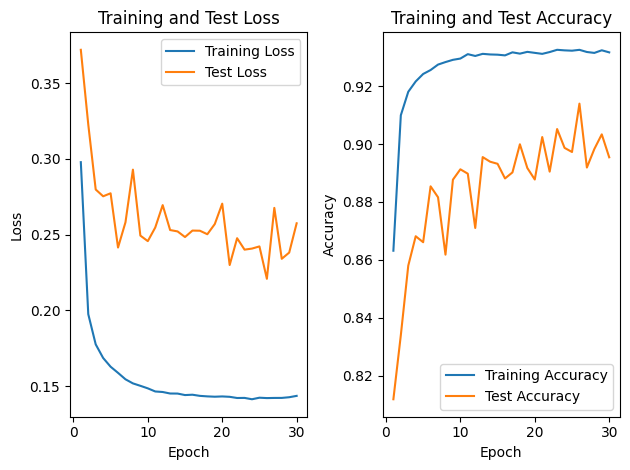

In [13]:
import torch.optim as optim

# Parameters
batch_size = 48
input_dim = X_train.shape[1]  # Number of features
output_dim = y_train.shape[1]  # Number of target classes
learning_rate = 0.0001

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True)
#val_loader = DataLoader(dataset=val_dataset ,batch_size = batch_size,  shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=False)

# Specify the device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")

print("Running on: ", device)

# Initialize the model and move it to the device
model =  MultiLabelCNNWithAttention(input_dim, output_dim).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Using Binary Cross Entropy Loss for Multi-class classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.004)

# Accuracy calculation function
def calculate_accuracy(y_pred, y_true):
    # Apply threshold to predictions
    y_pred = (y_pred > 0.5).float()
    # Match predictions with true labels
    correct = (y_pred == y_true).float().sum()
    accuracy = correct / y_true.numel()  # Total number of elements in y_true
    return accuracy.item()


# Training loop Validation and Test loop
train_losses = []
#valid_losses = []
test_losses = []

train_accuracies = []
test_accuracies = []


num_epochs = 30
for epoch in range(num_epochs):
    train_loss = 0
#    valid_loss = 0
    test_loss = 0

    train_accuracy = 0
    test_accuracy = 0

    
    model.train()  
    for X_train, y_train in train_loader:    
        X_train, y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        train_predictions = model(X_train)
    
    
        loss = criterion(train_predictions, y_train).to(device)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_train.size(0)

      # Calculate accuracy
        train_accuracy += calculate_accuracy(train_predictions, y_train) * X_train.size(0)
        
#        model.eval()       
#    with torch.no_grad():
#        for X_val, y_val in val_loader:
#            X_val, y_val = X_val.to(device), y_val.to(device)  # Move data to GPU
#            val_predictions = model(X_val)
#            loss = criterion(val_predictions, y_val).to(device)
#            valid_loss += loss.item() * X_val.size(0)
            
    model.eval()
    with torch.no_grad():
        for X_test, y_test in test_loader:            
            X_test, y_test = X_test.to(device), y_test.to(device)  # Move data to GPU
            test_predictions = model(X_test)
            loss = criterion(test_predictions, y_test).to(device)
            test_loss += loss.item() * X_test.size(0)
            # Calculate accuracy
            test_accuracy += calculate_accuracy(test_predictions, y_test) * X_test.size(0)
    
    
    # Calculate average loss per sample for the epoch
    train_loss /= len(train_loader.dataset)
    train_accuracy /= len(train_loader.dataset)
#    valid_loss /= len(val_loader.dataset)
    test_loss /= len(test_loader.dataset)
    test_accuracy /= len(test_loader.dataset)


    
    if (epoch+1) % 1 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}')
    
    # Append losses to the lists
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
#    valid_losses.append(valid_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)


# Evaluation
model.eval()
with torch.no_grad():
    train_loss = 0.0
    train_accuracy = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Loss calculation
        train_loss += criterion(outputs, labels).item() * inputs.size(0)

        # Predictions and Accuracy
        #_, predictions = torch.max(outputs, dim=1)  # Get predicted class
        #train_accuracy += (predictions == labels).sum().item()  # Count correct predictions

    # Normalize by the total number of samples
    train_loss /= len(train_loader.dataset)
    #train_accuracy /= len(train_loader.dataset)

    print(f'Train Loss: {train_loss:.4f}')
    #print(f'Train Accuracy: {train_accuracy:.4f}')


#model.eval()  
#with torch.no_grad():
#    val_loss = 0
#    for inputs, labels in val_loader:
#        outputs = model(inputs)
#        val_loss += criterion(outputs, labels).item() * X_val.size(0)
#    val_loss /= len(val_loader.dataset)
#    print(f'Validation Loss: {val_loss:.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    test_loss = 0.0
    test_accuracy = 0.0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Loss calculation
        test_loss += criterion(outputs, labels).item() * inputs.size(0)

        # Predictions and Accuracy
       # _, predictions = torch.max(outputs, dim=1)  # Get predicted class
        #test_accuracy += (predictions == labels).sum().item()  # Count correct predictions

    # Normalize by the total number of samples
    test_loss /= len(test_loader.dataset)
    #test_accuracy /= len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f}')
    #print(f'Test Accuracy: {test_accuracy:.4f}')

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy: 0.9365, Precision: 0.9374, Recall: 0.9365, F1 Score: 0.9365


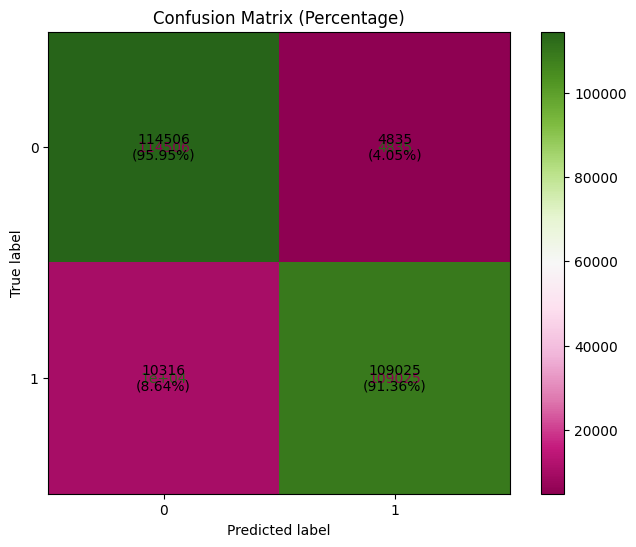

In [14]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Ensure model is in evaluation mode
model.eval()

# Initialize accumulators for predictions and ground truth
all_predictions = []
all_labels = []

# Forward pass in batches
with torch.no_grad():
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # Get model predictions
        predictions = model(X_batch)

        # Apply threshold for binary classification
        predictions_class = (predictions >= 0.5).float()

        # Accumulate predictions and labels
        all_predictions.append(predictions_class.cpu().numpy())
        all_labels.append(y_batch.cpu().numpy())

# Concatenate all batches into single arrays
all_predictions = np.concatenate(all_predictions, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Calculate metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='macro', zero_division=1)
recall = recall_score(all_labels, all_predictions, average='macro', zero_division=1)
f1 = f1_score(all_labels, all_predictions, average='macro', zero_division=1)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Normalize confusion matrix to get percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create confusion matrix display with percentages
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot confusion matrix as a heatmap with percentages
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap='PiYG', colorbar=True)

# Add labels with percentage values in the cells on separate lines
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = f"{cm[i, j]}\n({cm_percentage[i, j]:.2f}%)"
        ax.text(j, i, value, ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix (Percentage)')
plt.show()

Accuracy: 0.8954, Precision: 0.9050, Recall: 0.8878, F1 Score: 0.8925


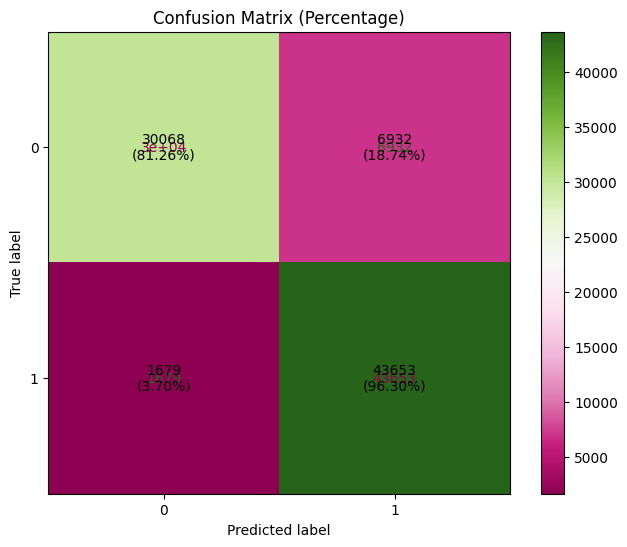

In [15]:

# Ensure model is in evaluation mode
model.eval()

# Initialize accumulators for predictions and ground truth
all_predictions = []
all_labels = []

# Forward pass in batches
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # Get model predictions
        predictions = model(X_batch)

        # Apply threshold for binary classification
        predictions_class = (predictions >= 0.5).float()

        # Accumulate predictions and labels
        all_predictions.append(predictions_class.cpu().numpy())
        all_labels.append(y_batch.cpu().numpy())

# Concatenate all batches into single arrays
all_predictions = np.concatenate(all_predictions, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Calculate metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='macro', zero_division=1)
recall = recall_score(all_labels, all_predictions, average='macro', zero_division=1)
f1 = f1_score(all_labels, all_predictions, average='macro', zero_division=1)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Normalize confusion matrix to get percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create confusion matrix display with percentages
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot confusion matrix as a heatmap with percentages
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap='PiYG', colorbar=True)

# Add labels with percentage values in the cells on separate lines
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = f"{cm[i, j]}\n({cm_percentage[i, j]:.2f}%)"
        ax.text(j, i, value, ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix (Percentage)')
plt.show()